# import dataset

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

import numpy as np

import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

C:\Users\2ha M2li322\AppData\Local\Temp\ipykernel_7124\2108697038.py:16: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [41]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# drop null values

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [43]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [44]:

data_encoded_1 = df.replace({
    'MSSubClass':{'False':0,'True':1},
    'MSZoning':{'False':0,'True':1},
    'LotFrontage':{'False':0,'True':1},
    'LotArea':{'False':0,'True':1},
    'Street':{'False':0,'True':1},
    'Alley':{'False':0,'True':1},
    'Utilities':{'False':0,'True':1},
    'LandContour':{'False':0,'True':1},
    
    
    
    'Street':{'False':0,'True':1},
    'Alley':{'False':0,'True':1},
    'Utilities':{'False':0,'True':1},
    'LandContour':{'False':0,'True':1},
    'Street':{'False':0,'True':1},
    'Alley':{'False':0,'True':1},
    'Utilities':{'False':0,'True':1},
    'LandContour':{'False':0,'True':1},
    'Street':{'False':0,'True':1},
    'Alley':{'False':0,'True':1},
    'Utilities':{'False':0,'True':1},
    'LandContour':{'False':0,'True':1},
    
    
})

data_encoded_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2


dfresult = df2.dropna(thresh=3)
print(dfresult)

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg  

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

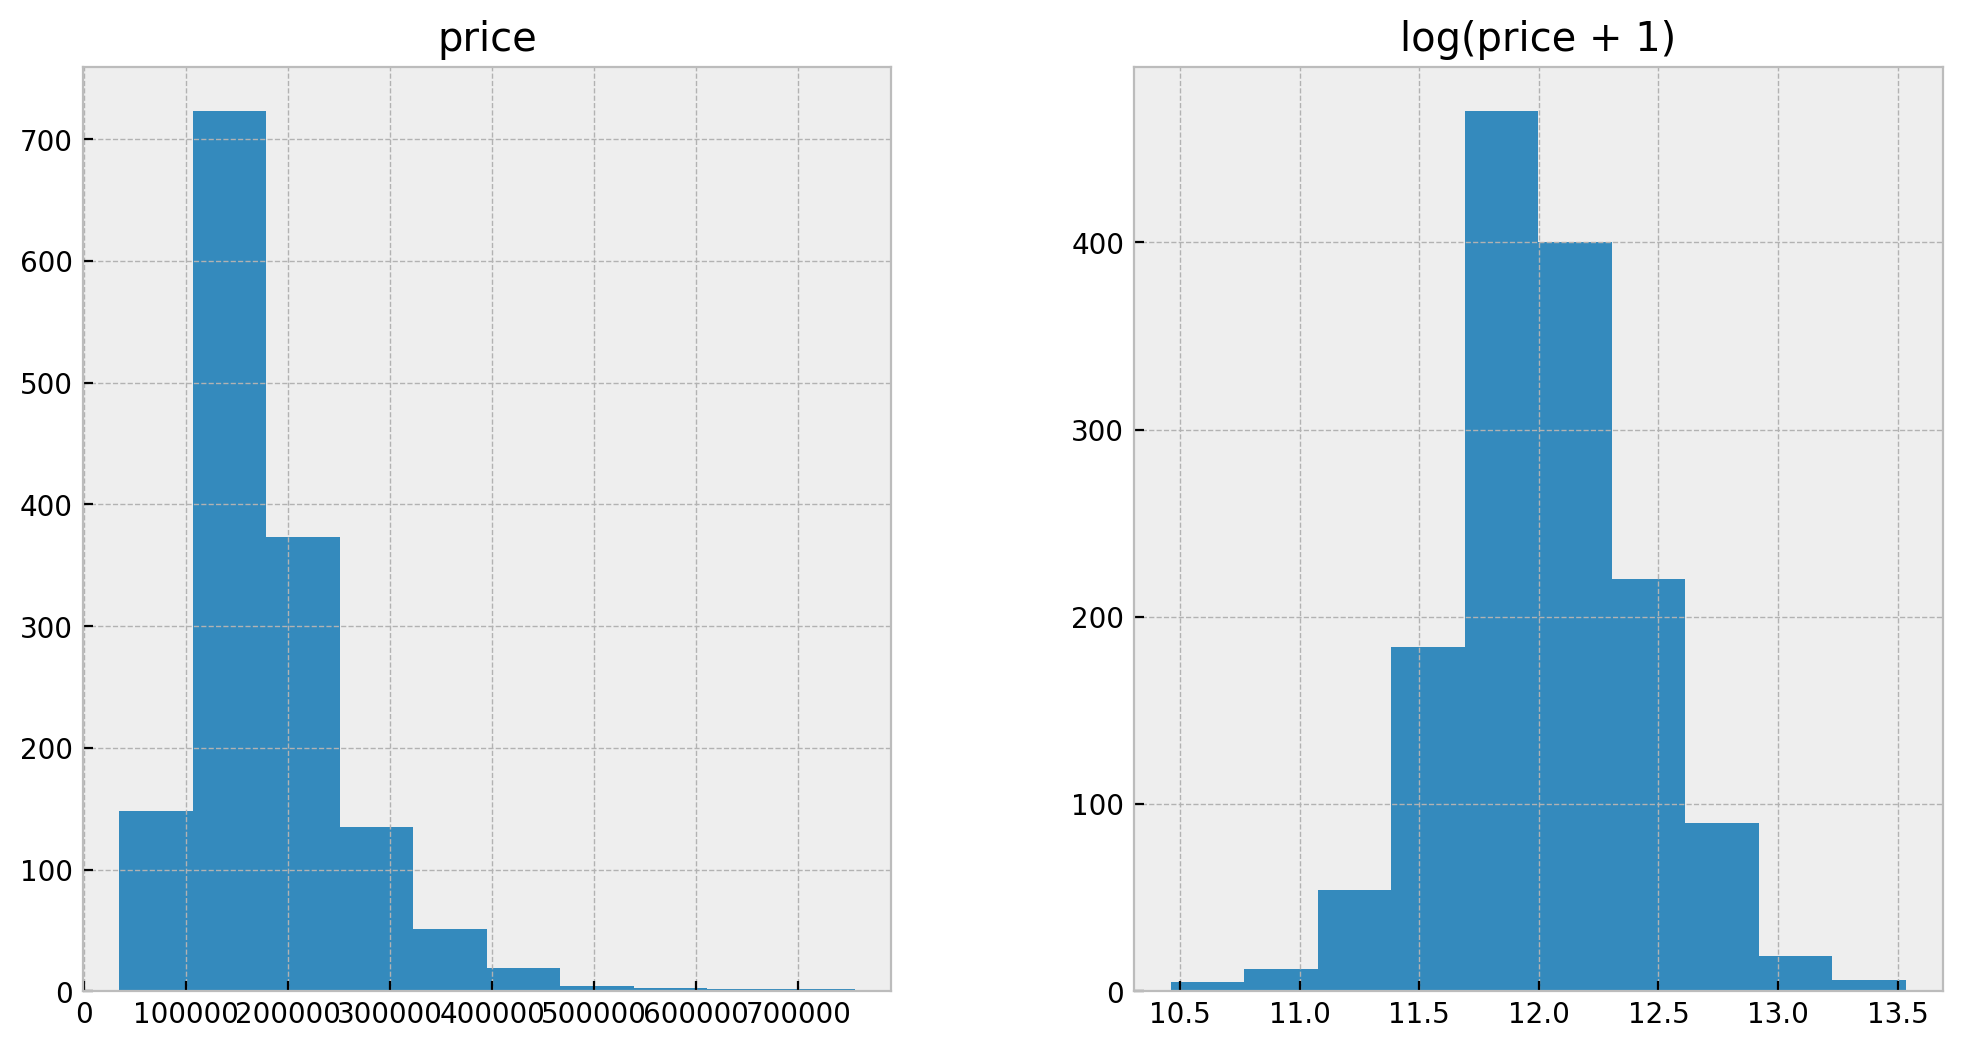

In [46]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df["SalePrice"], "log(price + 1)":np.log1p(df["SalePrice"])})
prices.hist()

In [47]:
df["SalePrice"] = np.log1p(df["SalePrice"])

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

In [48]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())

C:\Users\2ha M2li322\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


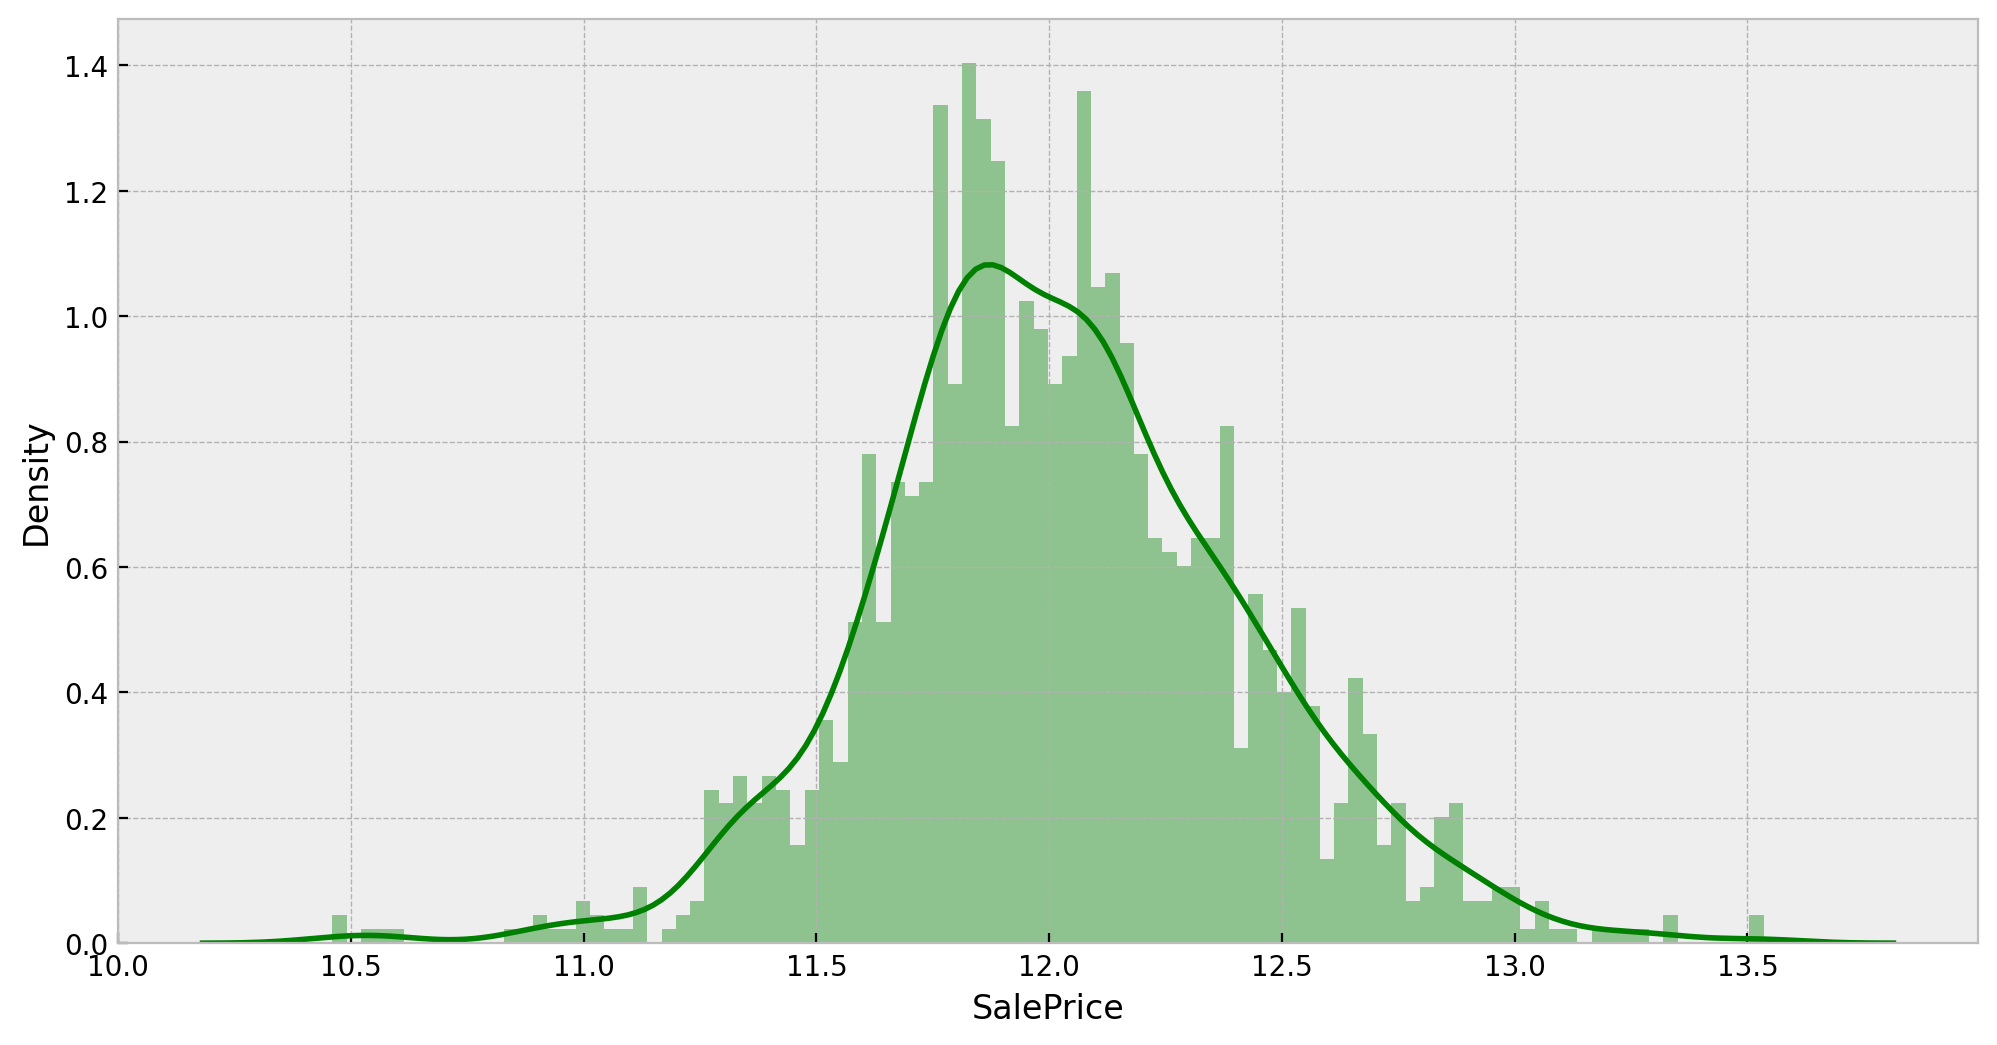

In [49]:
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

list the data type of our data

In [50]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('uint8'), dtype('float64')]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), int64(14), uint8(239)
memory usage: 762.9 KB


In [52]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,11.849405
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220


correlation between data

In [53]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.817185
GrLivArea       0.730254
GarageCars      0.680625
GarageArea      0.650888
1stFlrSF        0.608955
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
GarageYrBlt     0.500449
Name: SalePrice, dtype: float64


#Plot the numerical features and see which ones have very few or explainable outliers

#Remove the outliers from these features and see which one can have a good correlation without their outliers

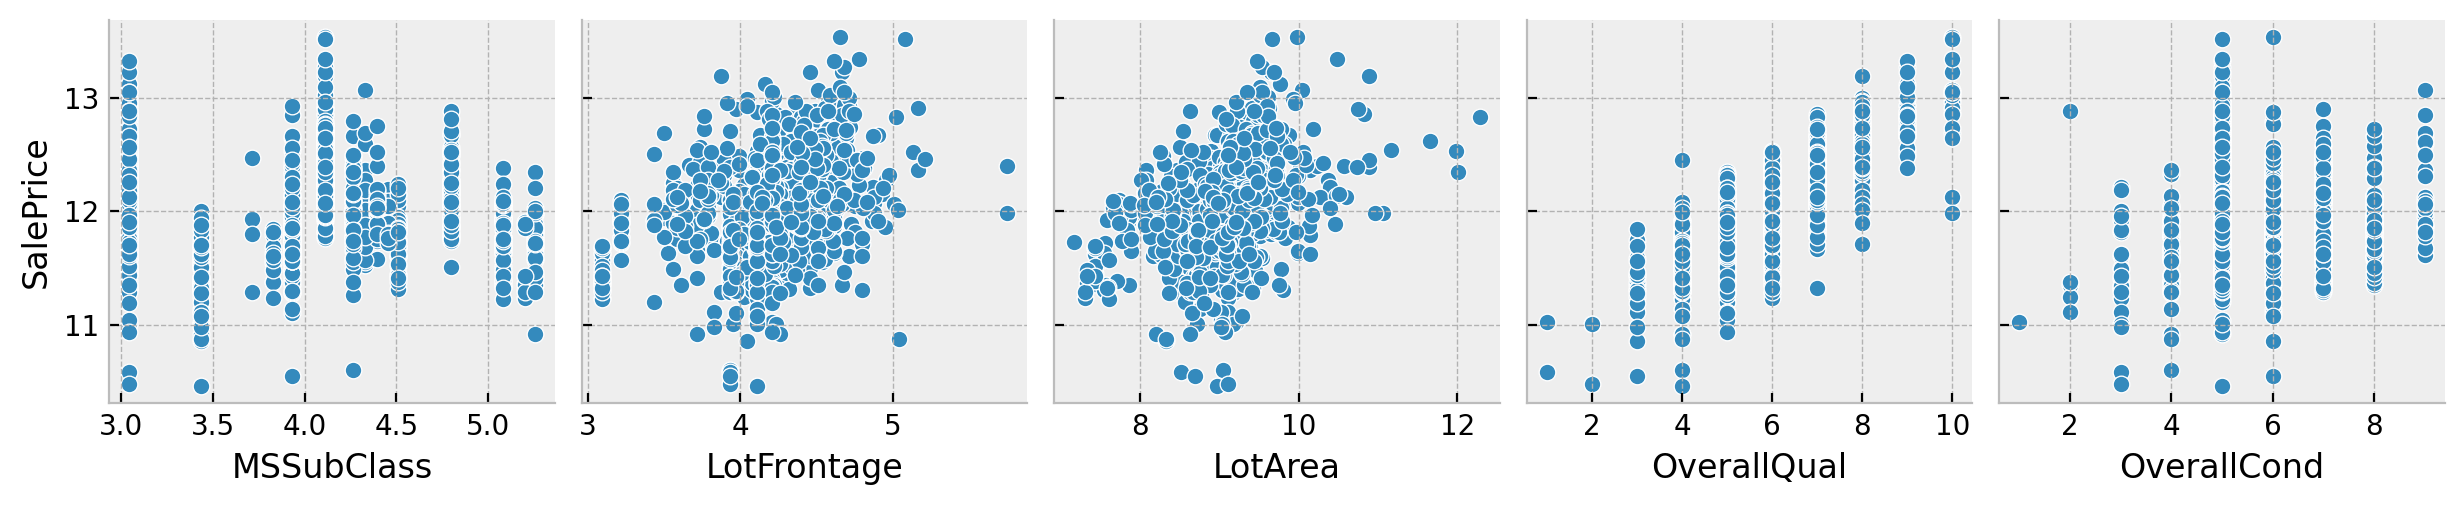

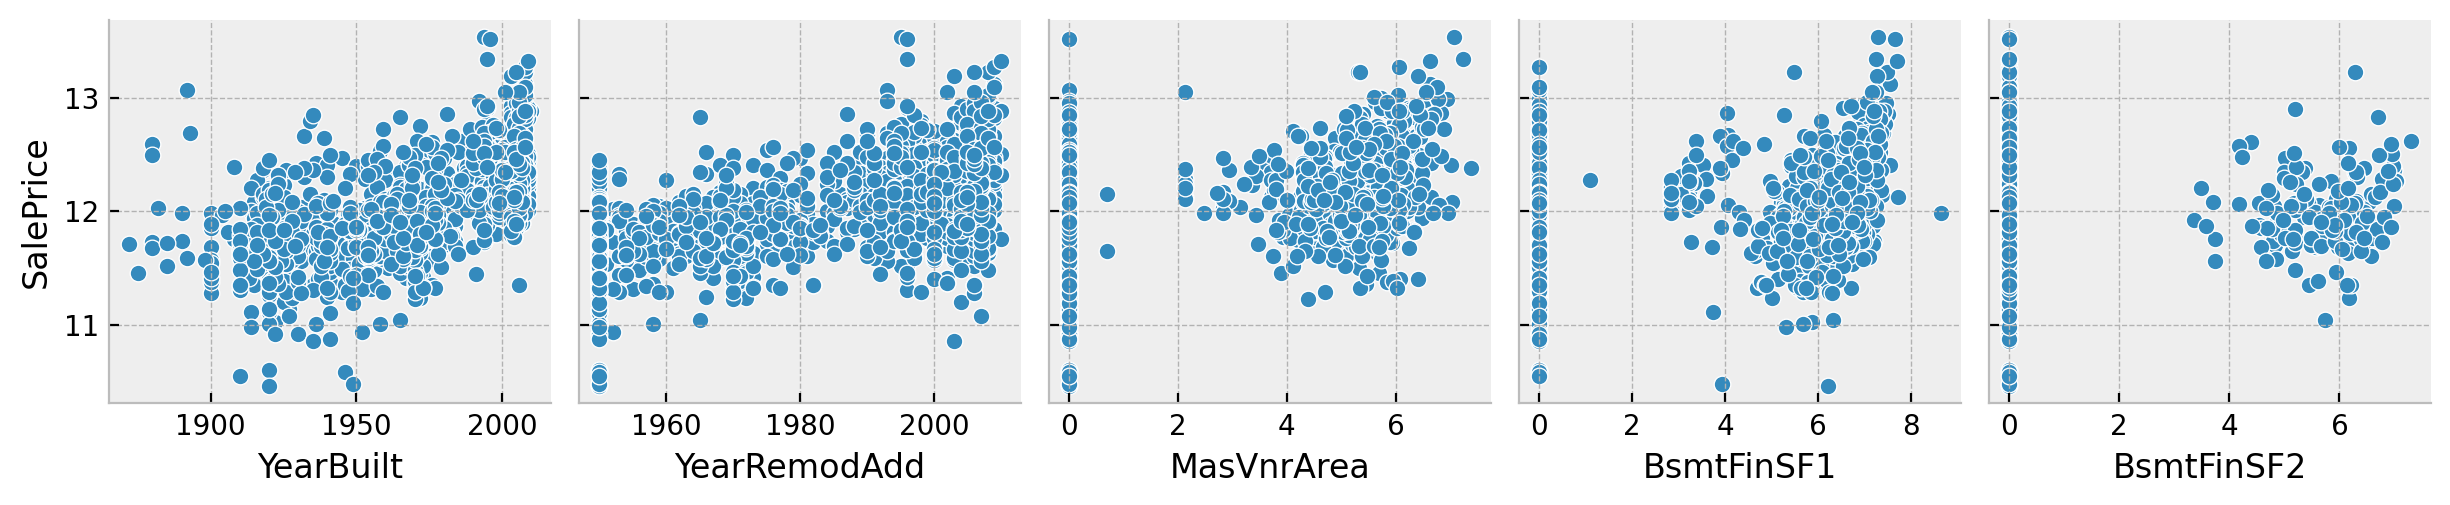

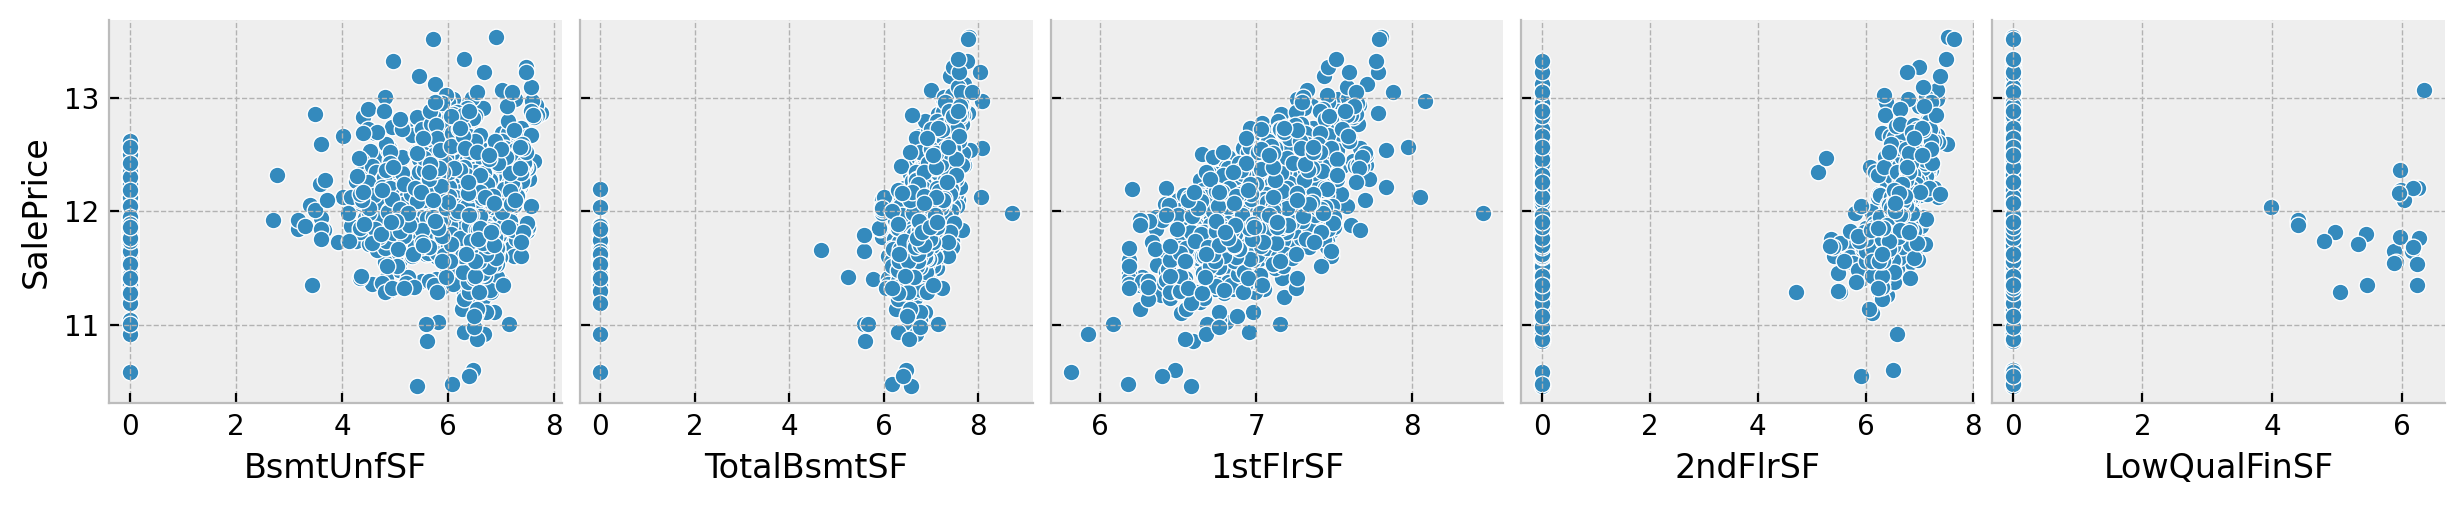

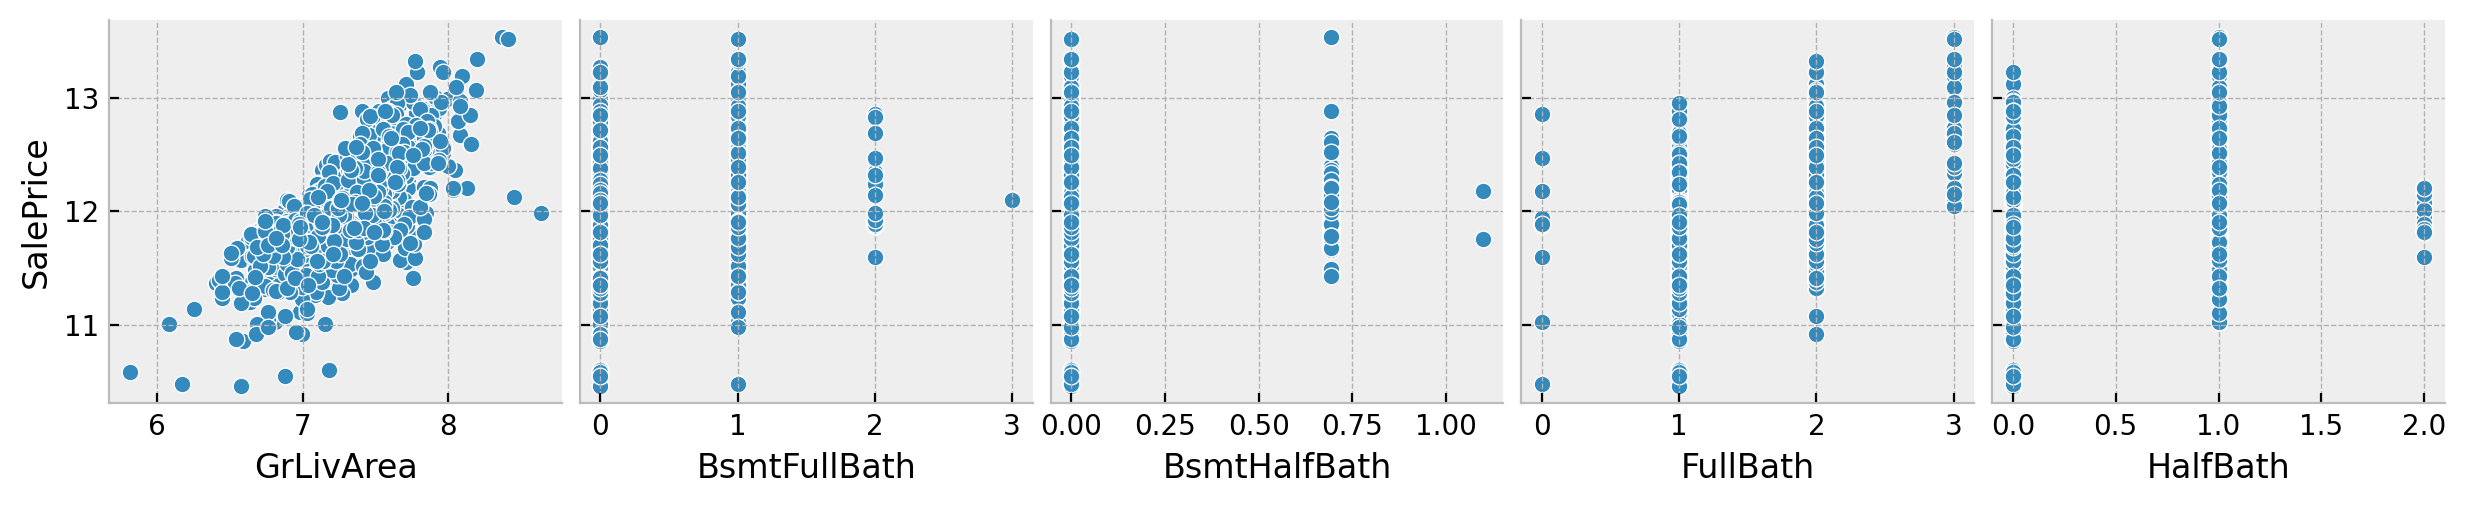

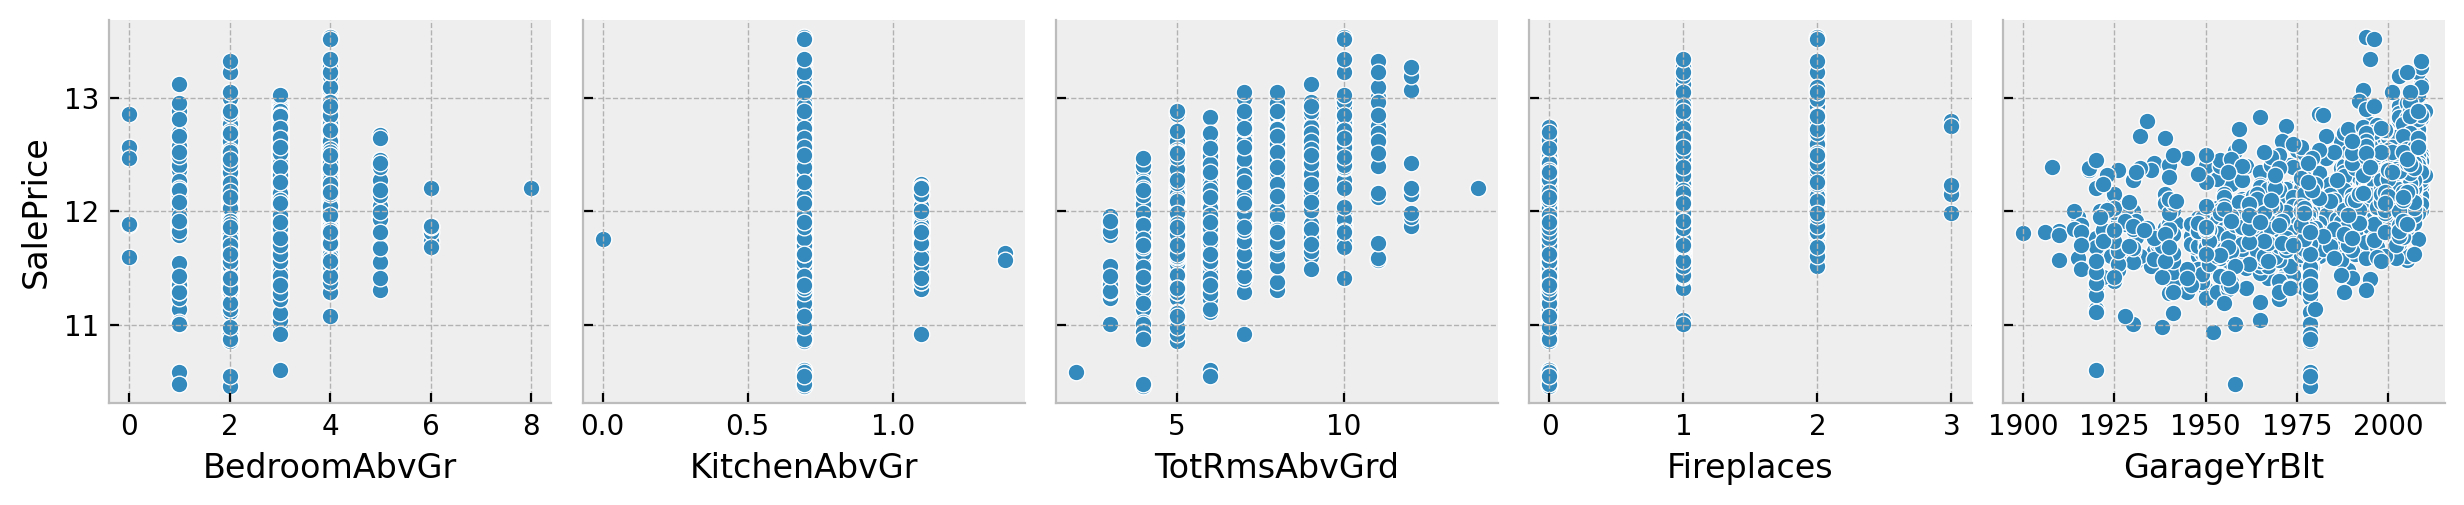

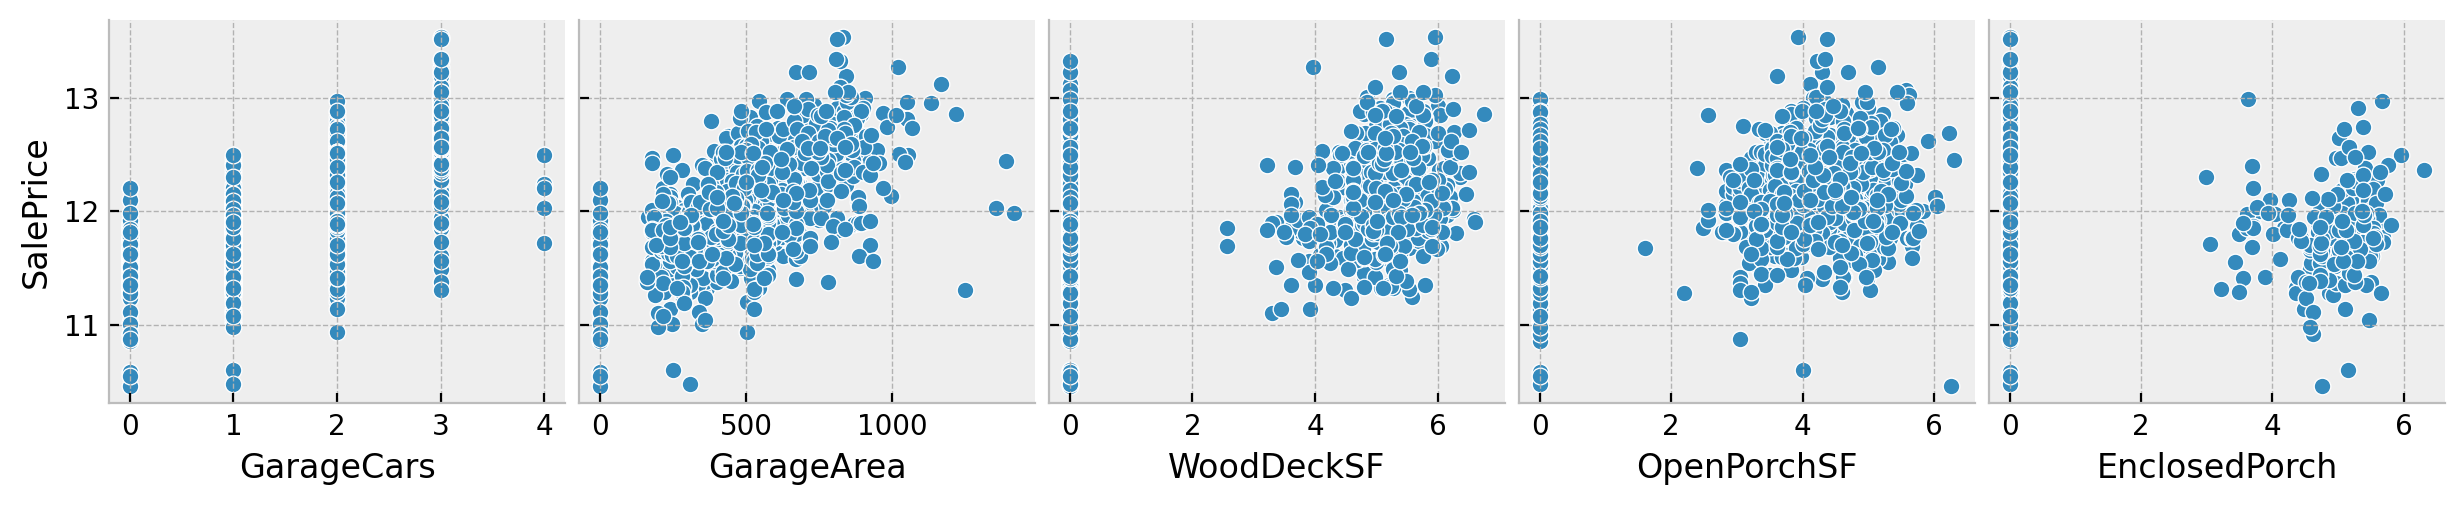

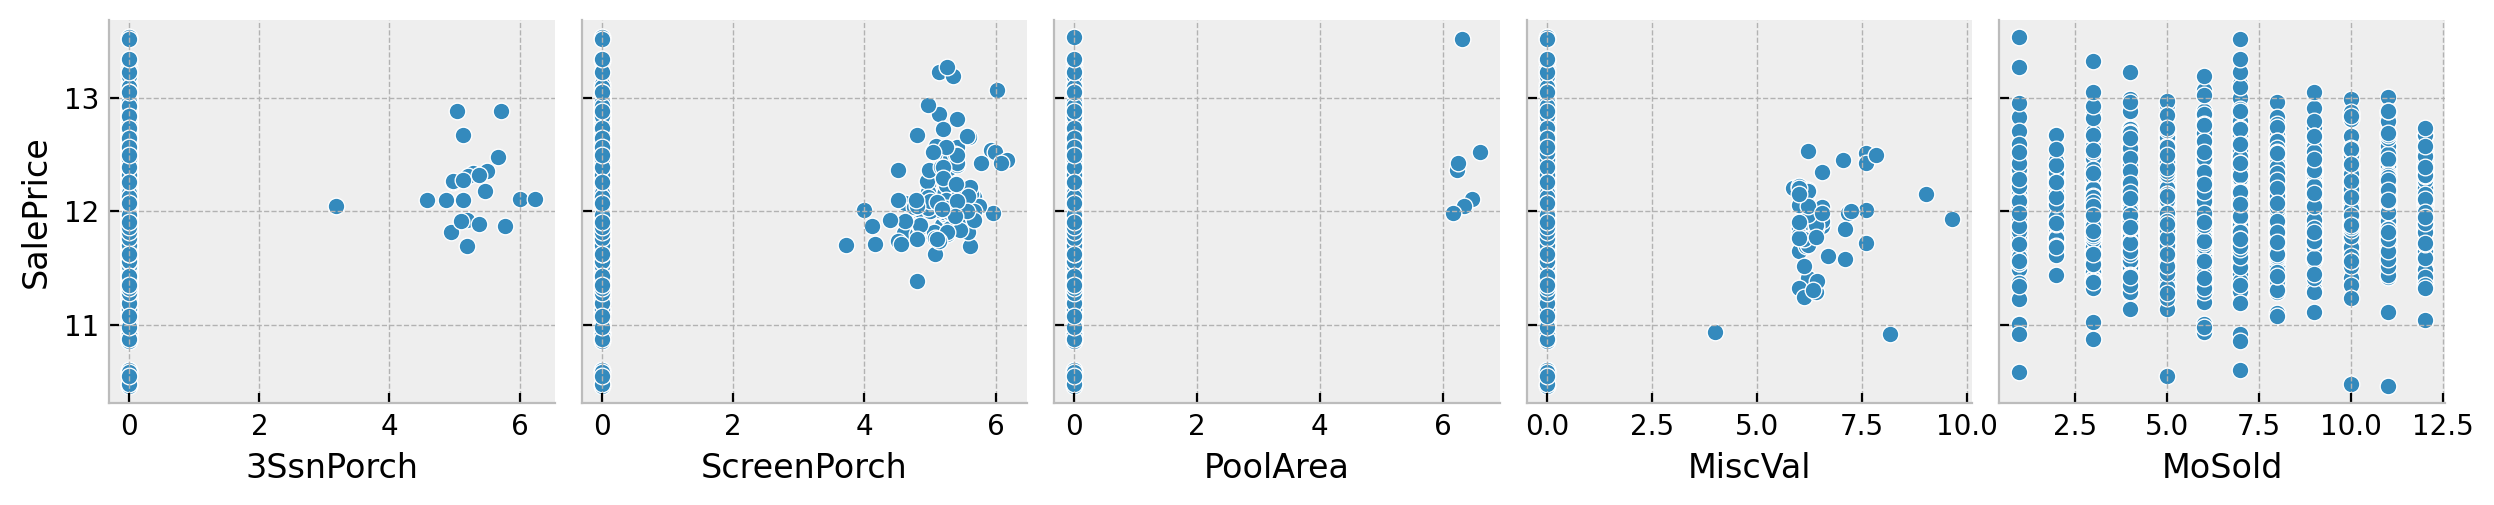

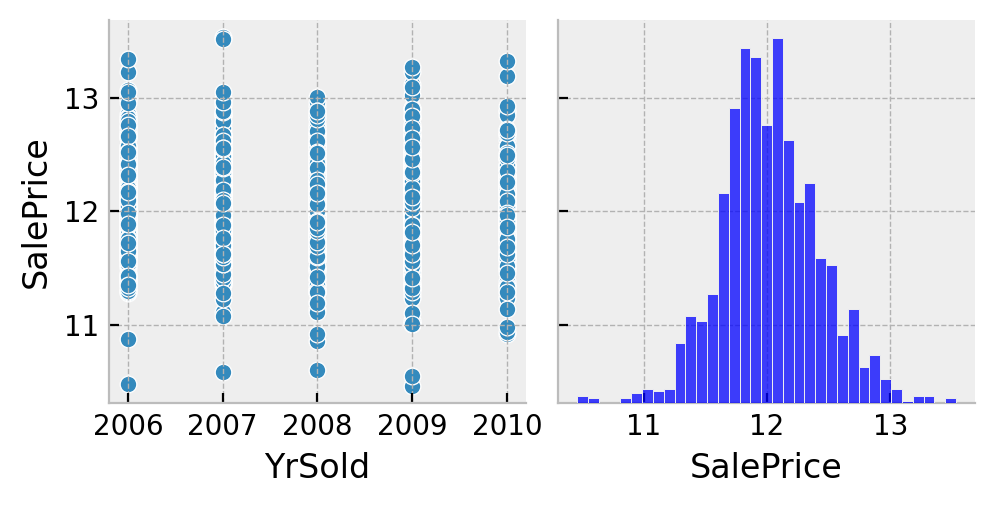

In [54]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

So now lets remove these 0 values and repeat the process of finding correlated values:

In [55]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.15130660674953594
       HalfBath: -0.0890688437053627
         YrSold: -0.03726291012022357
    OverallCond: -0.036868453834800925
   BsmtHalfBath: -0.02563150523528634
     MSSubClass: -0.020279019343282516
   BsmtFullBath: 0.019490498314602717
         MoSold: 0.057329504466222765
       PoolArea: 0.07098573638774296
      BsmtUnfSF: 0.08660100695243703
     BsmtFinSF2: 0.0980469191284899
     Fireplaces: 0.10582637957270662
      3SsnPorch: 0.12557214998335417
   LowQualFinSF: 0.1314920298534219
    OpenPorchSF: 0.1429496644167034
  EnclosedPorch: 0.16403114146063896
   BedroomAbvGr: 0.22215572989726678
        MiscVal: 0.2470392489816729
     WoodDeckSF: 0.2571029225179784
     BsmtFinSF1: 0.26411518020721947
     MasVnrArea: 0.2803613834313037
    ScreenPorch: 0.32894903040485707
    LotFrontage: 0.344440773978051
        LotArea: 0.3999231830717291
    GarageYrBlt: 0.5004490757119726
   TotRmsAbvGrd: 0.5344224002094399
   YearRemodAdd: 0.5656077814623218
    

In [56]:
train = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(train), train))

There is 12 strongly correlated values with SalePrice:
['GarageYrBlt', 'TotRmsAbvGrd', 'YearRemodAdd', 'YearBuilt', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'GarageArea', '2ndFlrSF', 'GarageCars', 'GrLivArea', 'OverallQual']


In [60]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

AttributeError: 'list' object has no attribute 'isnull'